## Install

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (23.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

## Import

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [2]:
plt.rc('font', family='NanumBarunGothic')

In [3]:
with open("./meta_list.json",'r') as f:
  meta_data = json.load(f)

In [4]:
meta_data.keys()

dict_keys(['album_genre', 'album_title', 'artists', 'has_lyric', 'lyric', 'play_time', 'release_date', 'track_id', 'track_title'])

## genre distribution

In [5]:
genre_list = []
for genre in meta_data['album_genre'].values():
  genre_items = list(map(str.strip,genre.split(',')))
  genre_list.extend(genre_items)
genre_count_dict = Counter(genre_list)

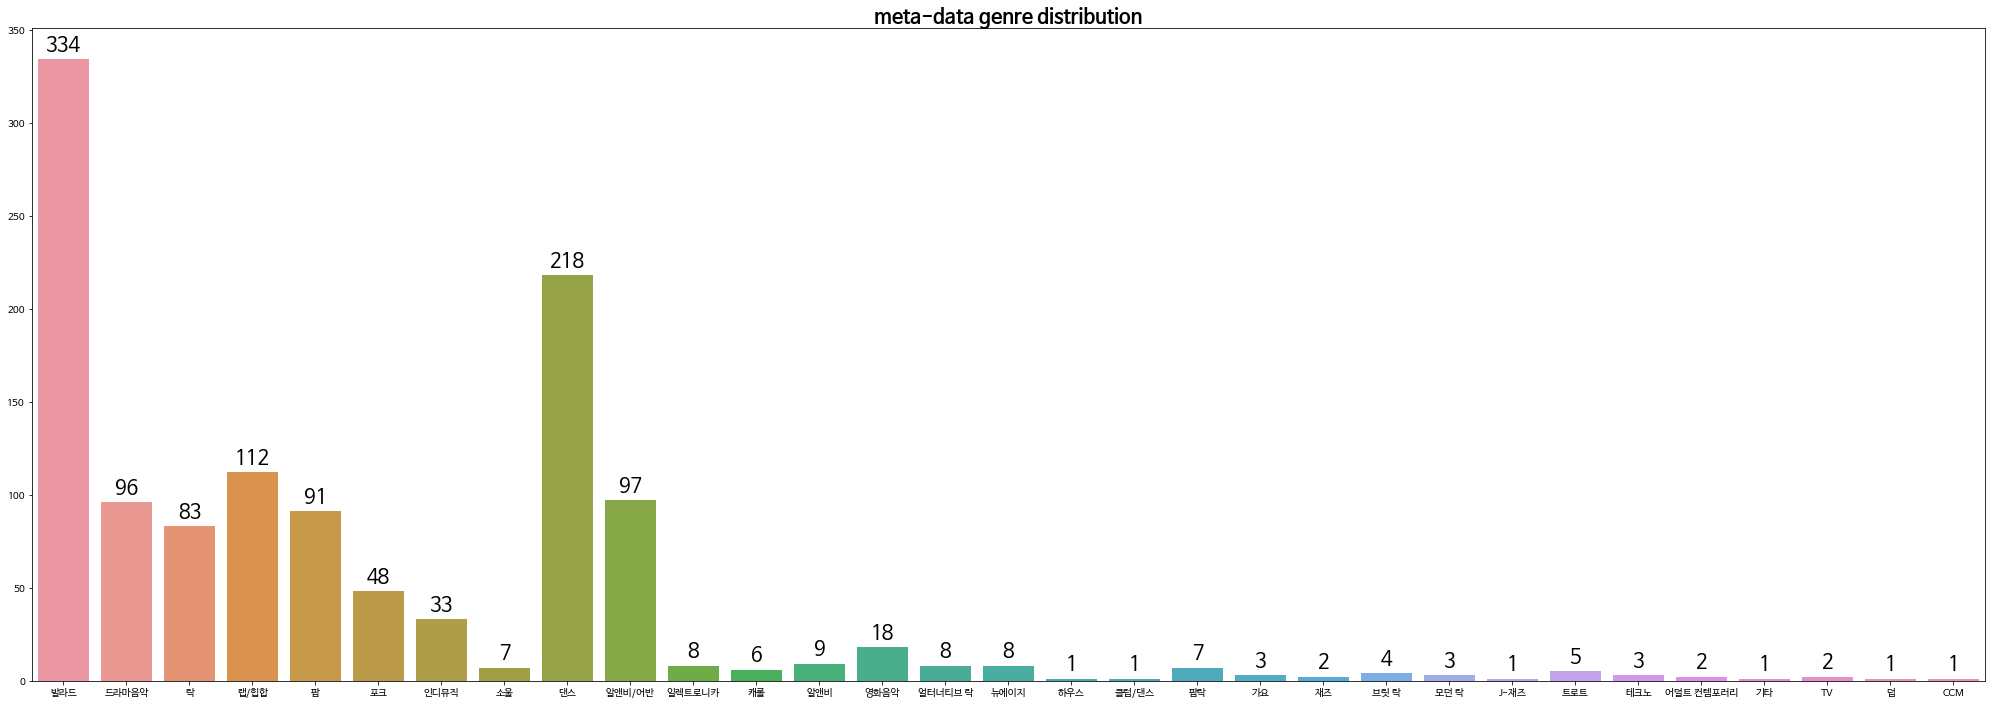

In [6]:
x = list(genre_count_dict.keys())
y = list(genre_count_dict.values())
plt.figure(figsize=(35,12))
ax = sns.barplot(x=x,y=y)
ax.set_title("meta-data genre distribution",fontdict={"fontsize":20,"fontweight":"bold"})
for i, v in enumerate(y):
    ax.text(i, v+5, str(v), fontdict={"fontsize":20},ha='center')
plt.show()

## lyric length

In [7]:
lyric_len_list = []
for lyric in meta_data['lyric'].values():
  if lyric is None:
    lyric_len = 0
  else:
    lyric_len = len(lyric)
  lyric_len_list.append(lyric_len)


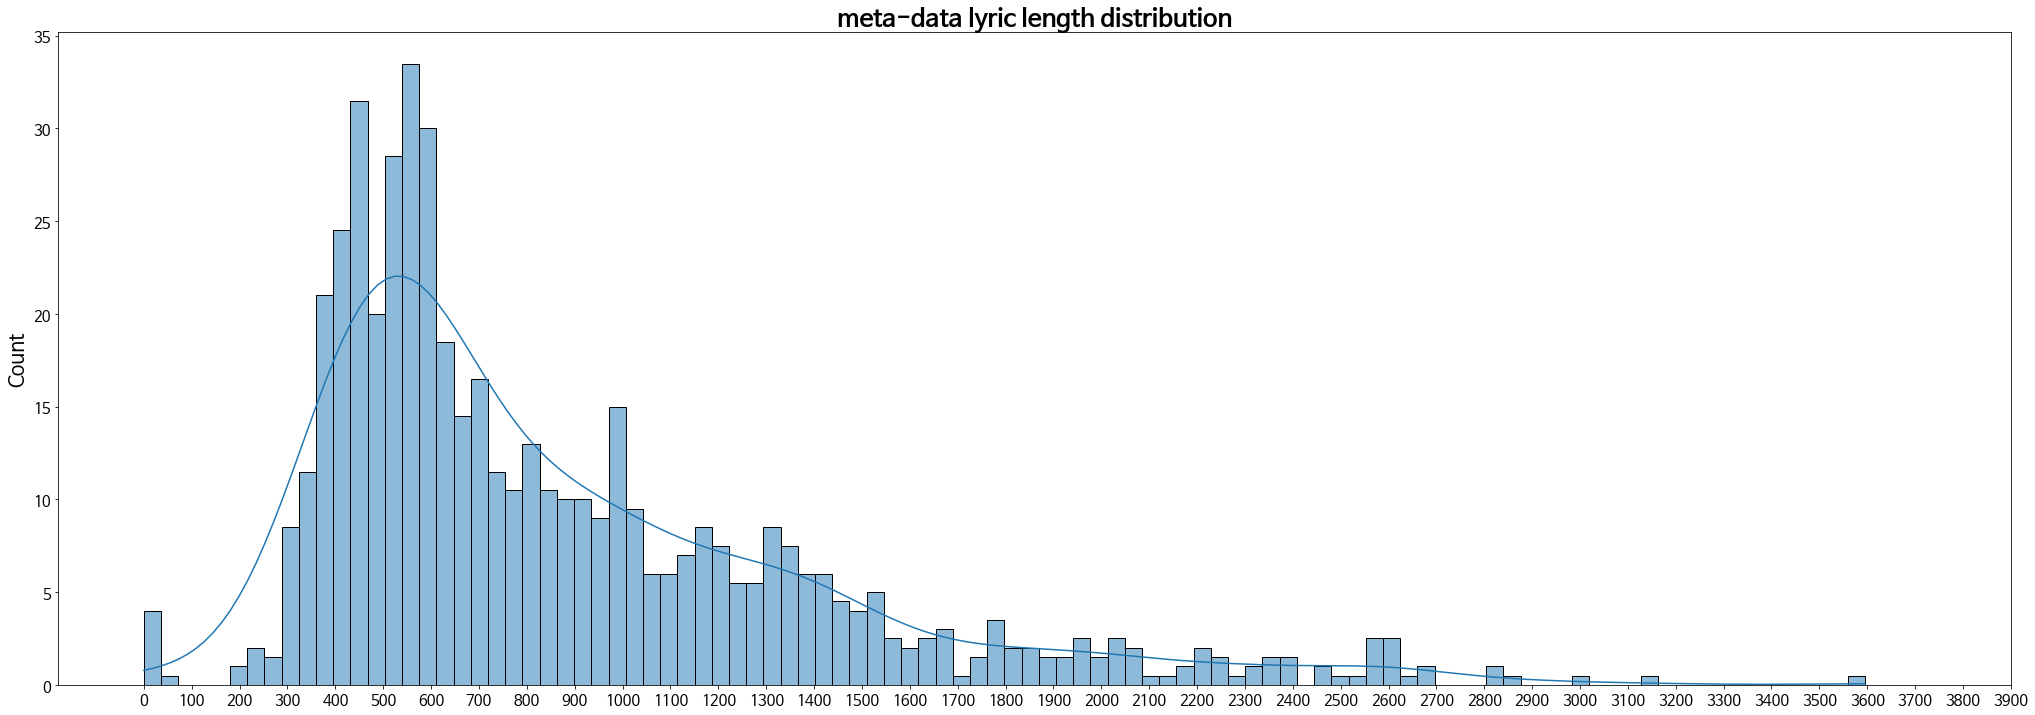

In [8]:
plt.figure(figsize=(35,12))
ax = sns.histplot(lyric_len_list,bins=100,kde=True)
ax.set_title("meta-data lyric length distribution",fontdict={"fontsize":25,"fontweight":"bold"})
ax.set_xticks(ticks=np.arange(0,4000,100))
ax.set_xticklabels(labels=np.arange(0,4000,100),fontdict={"fontsize":15})
ax.set_yticklabels(labels=np.arange(0,80,5),fontdict={"fontsize":15})
ax.set_ylabel(ylabel="Count",fontdict={"fontsize":20})
plt.show()

## No lyric items

In [9]:
no_lyric_key = []
for key,has_lyric in meta_data['has_lyric'].items():
  if not has_lyric:
    no_lyric_key.append(key)
    print("NO lyric.")
    print("title : {}".format(meta_data['track_title'][key]))
    print("artist : {}".format(meta_data['artists'][key]))
    print()

NO lyric.
title : Last Carnival
artist : ['Acoustic Cafe']

NO lyric.
title : River Flows In You
artist : ['이루마']

NO lyric.
title : 봄바람
artist : ['버스커 버스커']

NO lyric.
title : Kiss The Rain
artist : ['이루마']

NO lyric.
title : Salut D'Amour (Edward Elgar)
artist : ['Yuhki Kuramoto']

NO lyric.
title : Romance
artist : ['Yuhki Kuramoto']

NO lyric.
title : 세상의 약속 (하울의 움직이는 성)
artist : ['Elizabeth Bright']



## short lyric items

In [10]:
min_lyric_len=200
short_lyric_key = []
print("SHORT lyric.")
for key,lyric in meta_data['lyric'].items():
  if lyric is None:
    continue
  if len(lyric)<=min_lyric_len:
    short_lyric_key.append(key)
    print('='*100)
    print("title : {}".format(meta_data['track_title'][key]))
    print("artist : {}".format(meta_data['artists'][key]))
    print("lyric : {}".format(lyric))
    print()

SHORT lyric.
title : 인생의 회전목마 (하울의 움직이는 성)
artist : ['Elizabeth Bright']
lyric : 가사 준비중입니다...

title : 언제나 몇 번이라도 (센과 치히로의 행방불명)
artist : ['Elizabeth Bright']
lyric : 언제나 몇 번이라도 (센과 치히로의 행방불명) / Elizabeth Bright



## long lyric items

In [29]:
max_lyric_len=2000
long_lyric_key = []
print("LONG lyric.")
for key,lyric in meta_data['lyric'].items():
  if lyric is None:
    continue
  if len(lyric)>=max_lyric_len:
    lyric = lyric.replace('\r\n','\n')
    lyric = lyric.replace("\r","\n")
    long_lyric_key.append([key,meta_data['track_title'][key]])
    print('='*100)
    print("title : {}".format(meta_data['track_title'][key]))
    print("artist : {}".format(meta_data['artists'][key]))
    print("lyric : {}".format(lyric))
    print()

LONG lyric.
title : Shape of You
artist : ['Ed Sheeran']

title : Dynamite
artist : ['방탄소년단']

title : Love Yourself
artist : ['Justin Bieber']

title : 작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)
artist : ['방탄소년단', 'Halsey']

title : Attention
artist : ['Charlie Puth']

title : Sugar
artist : ['Maroon 5']

title : Havana (Feat. Young Thug)
artist : ['Camila Cabello']

title : Closer (Feat. Halsey)
artist : ['The Chainsmokers']

title : Uptown Funk (Feat. Bruno Mars)
artist : ['Mark Ronson']

title : Santa Tell Me
artist : ['Ariana Grande']

title : Rolling In The Deep
artist : ['Adele']

title : Memories
artist : ['Maroon 5']

title : We Don't Talk Anymore (Feat. Selena Gomez)
artist : ['Charlie Puth']

title : Moves Like Jagger (Studio Recording From "The Voice" Performance) (Feat. Christina Aguilera)
artist : ['Maroon 5']

title : See You Again (Feat. Charlie Puth)
artist : ['Wiz Khalifa']

title : Maps
artist : ['Maroon 5']

title : Hush
artist : ['Lasse Lindh']

title : Friends
arti

## 형태소 비교
1. konlpy 내부 모듈
2. kiwi library

In [30]:
!pip install konlpy
!pip install kiwipiepy
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.1 MB/s 
     |████████████████████████████████| 453 kB 37.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
     |████████████████████████████████| 30.0 MB 1.3 MB/s 
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.13.0-py3-none-any.whl size=30103568 sha256=563102dd5fbd1ea96e2ec0b09481ba357438894322069feab96e73691e131e57
  Stored in directory: /root/.cache/pip/wheels/ef/76/54/24f8a4f8de9818e0847b719cd7be1611f14eb1ce8d3dfe2460
Successfully built kiwipiepy-model


Installing automake (A dependency for mecab-ko)
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [3,329 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu b

In [31]:
from konlpy.tag import Mecab,Twitter,Hannanum, Kkma, Komoran
from kiwipiepy import Kiwi
import tqdm
from pprint import pprint

In [32]:
def isInKorean(input_s):
  for c in input_s:
      if ord('가') <= ord(c) <= ord('힣'):
          return 1
  return 0

mecab 형태소 분석기

In [41]:
tagging = Mecab()
pos_list = ['NNG','NN']
mecab_pos_result={}
for key,lyric in tqdm.tqdm_notebook(meta_data['lyric'].items()):
  if lyric is None or len(lyric)<200 or not isInKorean(lyric):
    continue
  pos_lyric = []
  for pos in tagging.pos(lyric):
    if pos[1] in pos_list:
      pos_lyric.append(pos)
  mecab_pos_result[key]=pos_lyric

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/1013 [00:00<?, ?it/s]

In [42]:
print("mecab 형태소 분석기 :")
for key in ['1','2','3']:
  print()
  print("track title : {}".format(meta_data['track_title'][key]))
  pprint(list(set(mecab_pos_result[key])))

mecab 형태소 분석기 :

track title : 모든 날, 모든 순간 (Every day, Every Moment)
[('불안', 'NNG'),
 ('유일', 'NNG'),
 ('눈빛', 'NNG'),
 ('순간', 'NNG'),
 ('삶', 'NNG'),
 ('송이', 'NNG'),
 ('빛', 'NNG'),
 ('그날', 'NNG'),
 ('이제', 'NNG'),
 ('품', 'NNG'),
 ('줄기', 'NNG'),
 ('꽃', 'NNG'),
 ('눈물', 'NNG'),
 ('사람', 'NNG'),
 ('꿈', 'NNG'),
 ('미래', 'NNG'),
 ('햇살', 'NNG'),
 ('품속', 'NNG'),
 ('날', 'NNG'),
 ('영원', 'NNG'),
 ('바람', 'NNG'),
 ('말', 'NNG'),
 ('생각', 'NNG'),
 ('지금', 'NNG'),
 ('휴식처', 'NNG'),
 ('하루', 'NNG'),
 ('시간', 'NNG')]

track title : 첫눈처럼 너에게 가겠다
[('축복', 'NNG'),
 ('질투', 'NNG'),
 ('세상', 'NNG'),
 ('순간', 'NNG'),
 ('전', 'NNG'),
 ('그날', 'NNG'),
 ('주름', 'NNG'),
 ('겁', 'NNG'),
 ('속', 'NNG'),
 ('때', 'NNG'),
 ('숨결', 'NNG'),
 ('첫눈', 'NNG'),
 ('행복', 'NNG'),
 ('꽃', 'NNG'),
 ('사람', 'NNG'),
 ('햇살', 'NNG'),
 ('곳', 'NNG'),
 ('영원', 'NNG'),
 ('기', 'NNG'),
 ('욕심', 'NNG'),
 ('손', 'NNG'),
 ('계절', 'NNG'),
 ('침', 'NNG'),
 ('빗물', 'NNG'),
 ('바람', 'NNG'),
 ('사랑', 'NNG'),
 ('쯤', 'NNG')]

track title : 벚꽃 엔딩
[('바람', 'NNG'),
 ('손', 'NNG'),
 ('

In [43]:
tagging = Twitter()
okt_pos_list = ['Noun']
okt_pos_result={}
for key,lyric in tqdm.tqdm_notebook(meta_data['lyric'].items()):
  if lyric is None or len(lyric)<200 or not isInKorean(lyric):
    continue
  pos_lyric = []
  for pos in tagging.pos(lyric):
    if pos[1] in okt_pos_list:
      pos_lyric.append(pos)
  okt_pos_result[key]=pos_lyric

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/1013 [00:00<?, ?it/s]

In [44]:
print("mecab 형태소 분석기 :")
for key in ['1','2','3']:
  print()
  print("track title : {}".format(meta_data['track_title'][key]))
  pprint(list(set(okt_pos_result[key])))

mecab 형태소 분석기 :

track title : 모든 날, 모든 순간 (Every day, Every Moment)
[('지금', 'Noun'),
 ('너', 'Noun'),
 ('그', 'Noun'),
 ('항상', 'Noun'),
 ('아', 'Noun'),
 ('빛', 'Noun'),
 ('품속', 'Noun'),
 ('영원', 'Noun'),
 ('나', 'Noun'),
 ('미래', 'Noun'),
 ('눈빛', 'Noun'),
 ('만큼', 'Noun'),
 ('모든', 'Noun'),
 ('바람', 'Noun'),
 ('줄기', 'Noun'),
 ('송이', 'Noun'),
 ('날', 'Noun'),
 ('준', 'Noun'),
 ('웃', 'Noun'),
 ('테', 'Noun'),
 ('하루', 'Noun'),
 ('휴식', 'Noun'),
 ('사람', 'Noun'),
 ('꽃', 'Noun'),
 ('생각', 'Noun'),
 ('고단', 'Noun'),
 ('말', 'Noun'),
 ('피고', 'Noun'),
 ('이제', 'Noun'),
 ('시간', 'Noun'),
 ('알', 'Noun'),
 ('그날', 'Noun'),
 ('해도', 'Noun'),
 ('수', 'Noun'),
 ('순간', 'Noun'),
 ('눈물', 'Noun'),
 ('꿈', 'Noun'),
 ('고', 'Noun'),
 ('처음', 'Noun'),
 ('처', 'Noun'),
 ('하나로', 'Noun'),
 ('네', 'Noun'),
 ('삶', 'Noun'),
 ('햇살', 'Noun'),
 ('해', 'Noun'),
 ('안', 'Noun'),
 ('내', 'Noun')]

track title : 첫눈처럼 너에게 가겠다
[('축복', 'Noun'),
 ('너', 'Noun'),
 ('그', 'Noun'),
 ('사랑', 'Noun'),
 ('주름', 'Noun'),
 ('만날', 'Noun'),
 ('속', 'Noun'),
 ('영원', 

꼬꼬마 형태소 분석기

In [45]:
tagging = Kkma()
kkma_pos_list = ['NNG','NN']
kkma_pos_result={}
for key,lyric in tqdm.tqdm_notebook(meta_data['lyric'].items()):
  if lyric is None or len(lyric)<200 or not isInKorean(lyric):
    continue
  pos_lyric = []
  for pos in tagging.pos(lyric):
    if pos[1] in kkma_pos_list:
      pos_lyric.append(pos)
  kkma_pos_result[key]=pos_lyric

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/1013 [00:00<?, ?it/s]

In [52]:
print("꼬꼬마 형태소 분석기 : ")
for key in ['1','2','3']:
  print()
  print("track title : {}".format(meta_data['track_title'][key]))
  pprint(list(set(kkma_pos_result[key])))

꼬꼬마 형태소 분석기 : 

track title : 모든 날, 모든 순간 (Every day, Every Moment)
[('고단', 'NNG'),
 ('불안', 'NNG'),
 ('처음', 'NNG'),
 ('유일', 'NNG'),
 ('눈빛', 'NNG'),
 ('순간', 'NNG'),
 ('삶', 'NNG'),
 ('송이', 'NNG'),
 ('빛', 'NNG'),
 ('그날', 'NNG'),
 ('이제', 'NNG'),
 ('갈게', 'NNG'),
 ('품', 'NNG'),
 ('해', 'NNG'),
 ('한줄기', 'NNG'),
 ('꽃', 'NNG'),
 ('내가', 'NNG'),
 ('눈물', 'NNG'),
 ('사람', 'NNG'),
 ('꿈', 'NNG'),
 ('미래', 'NNG'),
 ('햇살', 'NNG'),
 ('품속', 'NNG'),
 ('날', 'NNG'),
 ('영원', 'NNG'),
 ('바람', 'NNG'),
 ('나의', 'NNG'),
 ('말', 'NNG'),
 ('생각', 'NNG'),
 ('지금', 'NNG'),
 ('휴식처', 'NNG'),
 ('지', 'NNG'),
 ('하루', 'NNG'),
 ('시간', 'NNG')]

track title : 첫눈처럼 너에게 가겠다
[('축복', 'NNG'),
 ('질투', 'NNG'),
 ('세상', 'NNG'),
 ('순간', 'NNG'),
 ('삶', 'NNG'),
 ('전', 'NNG'),
 ('그날', 'NNG'),
 ('겁', 'NNG'),
 ('속', 'NNG'),
 ('때', 'NNG'),
 ('한번쯤', 'NNG'),
 ('숨결', 'NNG'),
 ('첫눈', 'NNG'),
 ('행복', 'NNG'),
 ('결', 'NNG'),
 ('꽃', 'NNG'),
 ('내가', 'NNG'),
 ('널', 'NNG'),
 ('사람', 'NNG'),
 ('햇살', 'NNG'),
 ('곳', 'NNG'),
 ('영원', 'NNG'),
 ('욕심', 'NNG'),
 ('손', 

한나눔 형태소 분석기

In [ ]:
tagging = Hannanum()
han_pos_list = ['N','P']
han_pos_result={}
for key,lyric in tqdm.tqdm_notebook(meta_data['lyric'].items()):
  if lyric is None or len(lyric)<200 or not isInKorean(lyric):
    continue
  pos_lyric = []
  for pos in tagging.pos(lyric):
    if pos[1] in han_pos_list:
      pos_lyric.append(pos)
  han_pos_result[key]=pos_lyric

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/1013 [00:00<?, ?it/s]

In [ ]:
print("한나눔 형태소 분석기 : ")
pprint(han_pos_result['3'])

kiwi 형태소 분석기

In [58]:
tagging = Kiwi()
kiwi_pos_list = ['NNG','NN']
kiwi_pos_result={}
for key,lyric in tqdm.tqdm_notebook(meta_data['lyric'].items()):
  if lyric is None or len(lyric)<200 or not isInKorean(lyric):
    continue
  pos_lyric = []
  for pos in list(tagging.tokenize(lyric)):
    if pos.tag in kiwi_pos_list:
      pos_lyric.append((pos.form,pos.tag))
  kiwi_pos_result[key]=pos_lyric
lyrics_list = list(meta_data['lyric'].values())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/1013 [00:00<?, ?it/s]

In [60]:
print("키위 형태소 분석기 : ")
for key in ['1','2','3']:
  print()
  print("track title : {}".format(meta_data['track_title'][key]))
  pprint(list(set(kiwi_pos_result[key])))

키위 형태소 분석기 : 

track title : 모든 날, 모든 순간 (Every day, Every Moment)
[('불안', 'NNG'),
 ('유일', 'NNG'),
 ('눈빛', 'NNG'),
 ('순간', 'NNG'),
 ('삶', 'NNG'),
 ('송이', 'NNG'),
 ('빛', 'NNG'),
 ('그날', 'NNG'),
 ('이제', 'NNG'),
 ('품', 'NNG'),
 ('줄기', 'NNG'),
 ('꽃', 'NNG'),
 ('눈물', 'NNG'),
 ('사람', 'NNG'),
 ('꿈', 'NNG'),
 ('미래', 'NNG'),
 ('햇살', 'NNG'),
 ('품속', 'NNG'),
 ('날', 'NNG'),
 ('영원', 'NNG'),
 ('바람', 'NNG'),
 ('고', 'NNG'),
 ('말', 'NNG'),
 ('생각', 'NNG'),
 ('휴식처', 'NNG'),
 ('하루', 'NNG'),
 ('시간', 'NNG')]

track title : 첫눈처럼 너에게 가겠다
[('축복', 'NNG'),
 ('질투', 'NNG'),
 ('세상', 'NNG'),
 ('순간', 'NNG'),
 ('삶', 'NNG'),
 ('전', 'NNG'),
 ('그날', 'NNG'),
 ('주름', 'NNG'),
 ('겁', 'NNG'),
 ('속', 'NNG'),
 ('때', 'NNG'),
 ('숨결', 'NNG'),
 ('첫눈', 'NNG'),
 ('행복', 'NNG'),
 ('꽃', 'NNG'),
 ('사람', 'NNG'),
 ('햇살', 'NNG'),
 ('곳', 'NNG'),
 ('영원', 'NNG'),
 ('욕심', 'NNG'),
 ('손', 'NNG'),
 ('계절', 'NNG'),
 ('빗물', 'NNG'),
 ('바람', 'NNG'),
 ('사랑', 'NNG')]

track title : 벚꽃 엔딩
[('오늘', 'NNG'),
 ('대여', 'NNG'),
 ('바람', 'NNG'),
 ('연인', 'NNG'),
 ('